## Observable trends based on the data:

1.  The lower the city is from the equator, the higher the maximum temperature.

2.  The latitude did not matter as much as to how cloudy or windy a city would be.

3.  A city's huidity was not dependent on the city's latitude.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = '../output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code #city.country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        
# Print the city count to confirm sufficient count
city_count = len(cities)
country_count = len(countries)
print(f'City count:  {city_count}; Country count:  {country_count}')


City count:  587; Country count:  587


In [4]:
#Retrieve the latitude and longitude from citipy

#Set up variables
city_name = ''
i = 0
record_count = 0

Lat = []
Lng = []
Date = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []

#Begin retrieval
pprint(f'Beginning Data Retrieval')
pprint(f'-----------------------------')

for city in cities:
   
    city_name = city
    record_count += 1
    
    w_response = requests.get('https://api.openweathermap.org/data/2.5/weather?q=' + city_name + '&units=imperial' 
                              + '&APPID=' + weather_api_key).json()
  
    try:
        pprint(f'Processing Record {record_count} | {city_name}')
        
        Lat.append(w_response['coord']['lat'])
        Lng.append(w_response['coord']['lon'])
        Date.append(w_response['dt'])
        Cloudiness.append(w_response['clouds']['all'])
        Max_Temp.append(w_response['main']['temp_max'])
        Humidity.append(w_response['main']['humidity'])
        Wind_Speed.append(w_response['wind']['speed'])

    
    except (KeyError, IndexError):
        pprint(f'Missing information for {city_name}. Skipping...')

pprint(f'-----------------------------')
pprint(f'Data Retrieval Complete')
pprint(f'-----------------------------')
        

'Beginning Data Retrieval'
'-----------------------------'
'Processing Record 1 | loei'
'Processing Record 2 | saint-philippe'
'Processing Record 3 | kapaa'
'Processing Record 4 | inta'
'Processing Record 5 | mataura'
'Processing Record 6 | castro'
'Processing Record 7 | yellowknife'
'Processing Record 8 | thompson'
'Processing Record 9 | ewa beach'
'Processing Record 10 | vaini'
'Processing Record 11 | russell'
'Processing Record 12 | avera'
'Processing Record 13 | neuquen'
'Processing Record 14 | belushya guba'
'Missing information for belushya guba. Skipping...'
'Processing Record 15 | khatanga'
'Processing Record 16 | barwadih'
'Processing Record 17 | atar'
'Processing Record 18 | kuala terengganu'
'Processing Record 19 | cape town'
'Processing Record 20 | amderma'
'Missing information for amderma. Skipping...'
'Processing Record 21 | georgetown'
'Processing Record 22 | cherskiy'
'Processing Record 23 | dikson'
'Processing Record 24 | punta arenas'
'Processing Record 25 | east lond

'Processing Record 209 | mehamn'
'Processing Record 210 | aswan'
'Processing Record 211 | velez-malaga'
'Processing Record 212 | minsk mazowiecki'
'Processing Record 213 | hofn'
'Processing Record 214 | jamestown'
'Processing Record 215 | zirandaro'
'Processing Record 216 | bagdarin'
'Processing Record 217 | martigny'
'Processing Record 218 | basco'
'Processing Record 219 | salinas'
'Processing Record 220 | mandalgovi'
'Processing Record 221 | porto novo'
'Processing Record 222 | guerrero negro'
'Processing Record 223 | nusaybin'
'Processing Record 224 | fortuna'
'Processing Record 225 | karaul'
'Missing information for karaul. Skipping...'
'Processing Record 226 | waipawa'
'Processing Record 227 | misratah'
'Processing Record 228 | rosa zarate'
'Processing Record 229 | grand gaube'
'Processing Record 230 | saint george'
'Processing Record 231 | ust-barguzin'
'Processing Record 232 | alexandria'
'Processing Record 233 | pontianak'
'Processing Record 234 | dudinka'
'Processing Record 23

'Processing Record 420 | fort-shevchenko'
'Processing Record 421 | panjab'
'Processing Record 422 | langsa'
'Processing Record 423 | beitbridge'
'Processing Record 424 | jomalig'
'Missing information for jomalig. Skipping...'
'Processing Record 425 | umm lajj'
'Processing Record 426 | tarudant'
'Missing information for tarudant. Skipping...'
'Processing Record 427 | along'
'Processing Record 428 | charters towers'
'Processing Record 429 | srandakan'
'Processing Record 430 | takaka'
'Processing Record 431 | christchurch'
'Processing Record 432 | formoso do araguaia'
'Missing information for formoso do araguaia. Skipping...'
'Processing Record 433 | vanavara'
'Processing Record 434 | inhambane'
'Processing Record 435 | acapulco'
'Processing Record 436 | luderitz'
'Processing Record 437 | baykit'
'Processing Record 438 | mindelo'
'Processing Record 439 | osuna'
'Processing Record 440 | khonuu'
'Missing information for khonuu. Skipping...'
'Processing Record 441 | isla vista'
'Processing R

In [5]:
#Retrieve the latitude and longitude from citipy

#Set up variables
city_name = ''
i = 0
print_count = 0
record_count = 0
set_count = 1

base_url = 'https://api.openweathermap.org/data/2.5/weather'
params = {
    'q':None,
    'units':'imperial',
    'APPID':weather_api_key
}

Lat = []
Lng = []
Date = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []

#Begin retrieval
pprint(f'Beginning Data Retrieval')
pprint(f'-----------------------------')

if record_count < city_count: 
         
    for city in cities:

        params['q'] = city
        record_count += 1

        if print_count < 100:

            print_count += 1
            
            w_response = requests.get(base_url, params = params).json()

            try:

                pprint(f'Processing Record {print_count} in Set {set_count} | {city}')

                Lat.append(w_response['coord']['lat'])
                Lng.append(w_response['coord']['lon'])
                Date.append(w_response['dt'])
                Cloudiness.append(w_response['clouds']['all'])
                Max_Temp.append(w_response['main']['temp_max'])
                Humidity.append(w_response['main']['humidity'])
                Wind_Speed.append(w_response['wind']['speed'])

            except (IndexError):
                pprint(f'Missing information for {city_name}. Skipping...')
           

        else:

            set_count += 1
            print_count = 0

pprint(f'-----------------------------')
pprint(f'Data Retrieval Complete')
pprint(f'-----------------------------')
        

'Beginning Data Retrieval'
'-----------------------------'
'Processing Record 1 in Set 1 | olafsvik'


KeyError: 'coord'

In [5]:
#Concatnate the lists of city data
cities = pd.Series(cities)
countries = pd.Series(countries)
Lat = pd.Series(Lat)
Lng = pd.Series(Lng)
Date = pd.Series(Date)
Max_Temp = pd.Series(Max_Temp)
Cloudiness = pd.Series(Cloudiness)
Humidity = pd.Series(Humidity)
Wind_Speed = pd.Series(Wind_Speed)

city_data = pd.concat([cities, countries, Lat, Lng, Date, Max_Temp, Cloudiness, Humidity, Wind_Speed],
                      axis = 1, join = 'inner')

city_data.columns = ['City', 'Country', 'Lat', 'Lng', 'Date', 'Max Temp (F)', 'Cloudiness',
                                           'Humidity', 'Wind Speed']

#Write the data to the cities.csv file
city_data.to_csv(output_data_file, index = False, header = True)

#Create a dataframe of the cities csv file
city_df = pd.read_csv(output_data_file)

city_df.head(10)
    


,City,Country,Lat,Lng,Date,Max Temp (F),Cloudiness,Humidity,Wind Speed
0,loei,th,17.42,101.50,1580007262,79.00,70,60,1.12
1,saint-philippe,re,-21.36,55.77,1580007262,73.40,90,83,9.17
2,kapaa,us,22.08,-159.32,1580007263,78.80,40,65,6.93
3,inta,ru,66.03,60.17,1580007263,-9.24,87,99,2.06
4,mataura,pf,-46.19,168.86,1580007263,77.65,64,58,0.58
5,castro,cl,-24.79,-50.01,1580007264,61.63,0,93,2.84
6,yellowknife,ca,62.46,-114.35,1580007264,10.40,90,85,6.93
7,thompson,ca,55.74,-97.86,1580007202,15.80,90,92,2.24
8,ewa beach,us,21.32,-158.01,1580007264,82.40,20,65,9.17
9,vaini,to,-21.20,-175.20,1580007264,80.60,75,88,13.87


## SCATTER PLOTS

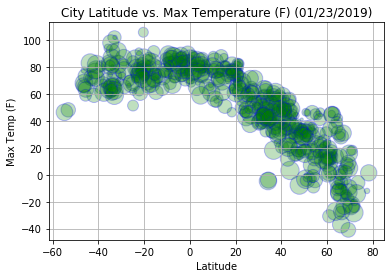

<Figure size 432x288 with 0 Axes>

In [8]:
#Loop through cities csv file to create the 'City Latitude vx. Max Temp' scatter plot
x = []
y = []

with open(output_data_file) as city_file:
    
    plot = pd.read_csv(city_file, delimiter = ',')
    
    for lat in plot['Lat']:
        x.append(lat)
        
    for temp in plot['Max Temp (F)']:
        y.append(temp)
        
        
x_limit = 360
x_axis = np.arange(0, x_limit, 10)

plt.scatter(x, y, marker = 'o', facecolors = 'g', edgecolors = 'b', s = x_axis, alpha = 0.25)

plt.title('City Latitude vs. Max Temperature (F) (01/23/2019)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid()

plt.show()

plt.savefig('output_data/LatvTemp')

The above scatter plot shows that as the cities are more north of the celestial equator, the maximum temperature is lower.  Whereas, the cities below the equator have higher maximum temperatures with a couple of outliers.

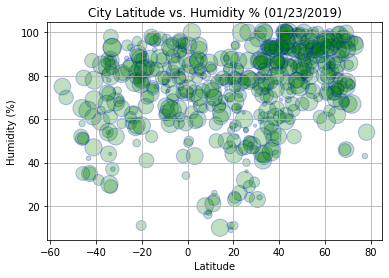

<Figure size 432x288 with 0 Axes>

In [9]:
#Loop through cities csv file to create the 'City Latitude vx. Humidity' scatter plot
x = []
y = []

with open(output_data_file) as city_file:
    
    plot = pd.read_csv(city_file, delimiter = ',')
    
    for lat in plot['Lat']:
        x.append(lat)
        
    for humidity in plot['Humidity']:
        y.append(humidity)
        
        
x_limit = 360
x_axis = np.arange(0, x_limit, 10)
y_limit = 300
y_axis = np.arange(0, y_limit, 100)

plt.scatter(x, y, marker = 'o', facecolors = 'g', edgecolors = 'b', s = x_axis, alpha = 0.25)

plt.title('City Latitude vs. Humidity % (01/23/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

plt.show()

plt.savefig('output_data/LatvHumidity')

The 'City Latitude vs. Humidity % (01/23/2019)' scatter plot shows that the humidiy is not dependent on the latitude.

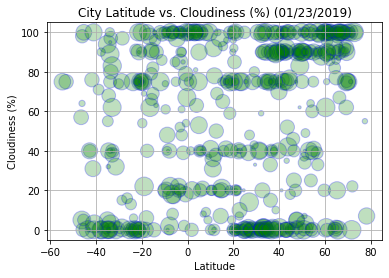

<Figure size 432x288 with 0 Axes>

In [10]:
#Loop through cities csv file to create the 'City Latitude vx. Cloudiness' scatter plot
x = []
y = []

with open(output_data_file) as city_file:
    
    plot = pd.read_csv(city_file, delimiter = ',')
    
    for lat in plot['Lat']:
        x.append(lat)
        
    for cloudiness in plot['Cloudiness']:
        y.append(cloudiness)
        
        
x_limit = 360
x_axis = np.arange(0, x_limit, 10)
y_limit = 80
y_axis = np.arange(0, y_limit, 10)

plt.scatter(x, y, marker = 'o', facecolors = 'g', edgecolors = 'b', s = x_axis, alpha = 0.25)

plt.title('City Latitude vs. Cloudiness (%) (01/23/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

plt.show()

plt.savefig('output_data/LatvCloudiness')

The above scatter plot demonstrates that the location of the city is not a determining factor for how cloudy a city is.

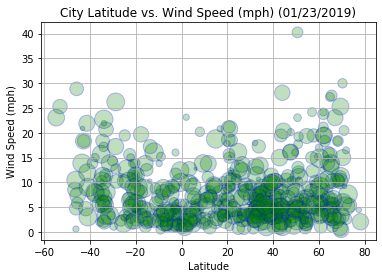

<Figure size 432x288 with 0 Axes>

In [11]:
#Loop through cities csv file to create the 'City Latitude vx. Wind Speed' scatter plot
x = []
y = []

with open(output_data_file) as city_file:
    
    plot = pd.read_csv(city_file, delimiter = ',')
    
    for lat in plot['Lat']:
        x.append(lat)
        
    for wind_speed in plot['Wind Speed']:
        y.append(wind_speed)
        
        
x_limit = 360
x_axis = np.arange(0, x_limit, 10)
y_limit = 80
y_axis = np.arange(0, y_limit, 100)

plt.scatter(x, y, marker = 'o', facecolors = 'g', edgecolors = 'b', s = x_axis, alpha = 0.25)

plt.title('City Latitude vs. Wind Speed (mph) (01/23/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

plt.show()

plt.savefig('output_data/LatvWindSpeed')

The above 'Latitude vs. Wind Speed' plot shows that the spped of the wind is not dependent on the latitude.

## Linear Regressions

In [15]:
# Create Northern and Southern Hemisphere DataFrames

North_Hemisphere_df = city_df.loc[city_df['Lat'] >= 0, :]
South_Hemisphere_df = city_df.loc[city_df['Lat'] < 0, :]


### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8684389358666162


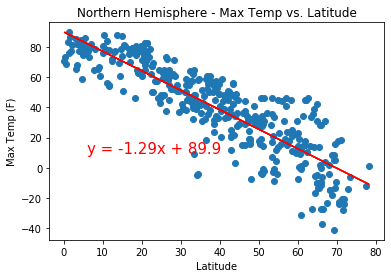

In [32]:
#Create the linear regression for the cities' max temperature vs. the northern latitudes
x = North_Hemisphere_df['Lat']
y = North_Hemisphere_df['Max Temp (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-squared is: {rvalue}')

plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

plt.show()

The above regression demonstrates that the higher the city's latitude, the lower the max temperature will be.

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3828575385081982


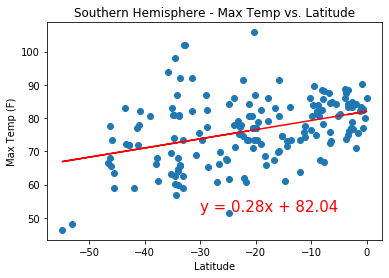

In [33]:
#Create the linear regression for the cities' max temperature vs. the southern latitudes
x = South_Hemisphere_df['Lat']
y = South_Hemisphere_df['Max Temp (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-squared is: {rvalue}')

plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq, xy=(-50, 60), xytext=(-30, 52), fontsize=15,color="red")

plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

plt.show()

The above regression shos that the maximum temperature is less dependent on the southern latitude as it has many outliers.

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3708808659696609


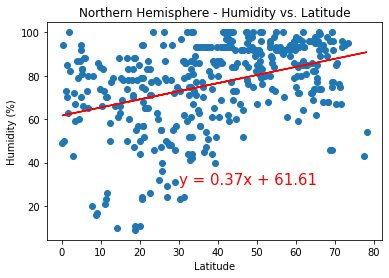

In [34]:
#Create the linear regression for the cities' humidity vs. the northern latitudes
x = North_Hemisphere_df['Lat']
y = North_Hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-squared is: {rvalue}')

plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(30,30),fontsize=15,color="red")

plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()

It's more likely that cities north of the equator will have high humidity, but there are many outliers.

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.31919821980238144


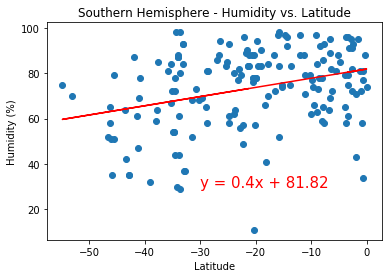

In [35]:
#Create the linear regression for the cities' humidity vs. the southern latitudes
x = South_Hemisphere_df['Lat']
y = South_Hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-squared is: {rvalue}')

plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq, xy=(-50, 60), xytext=(-30, 30), fontsize=15,color="red")

plt.title('Southern Hemisphere - Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()

As the southern cities' latitudes approach the equator, the more humidity is in the air, but there are too many outliers.

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.25234767214106796


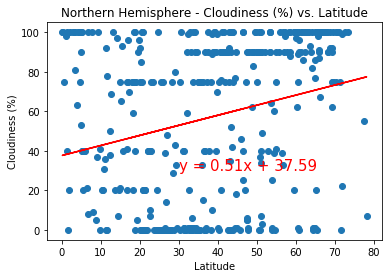

In [36]:
#Create the linear regression for the cities' cloudiness vs. the northern latitudes
x = North_Hemisphere_df['Lat']
y = North_Hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-squared is: {rvalue}')

plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(30,30),fontsize=15,color="red")

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

The above linear regression show that as the city is higher than the equator, it should have more clouds but there are too many outliers.

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2590669639672893


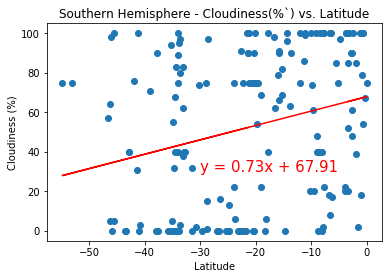

In [37]:
#Create the linear regression for the cities' cloudiness vs. the southern latitudes
x = South_Hemisphere_df['Lat']
y = South_Hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-squared is: {rvalue}')

plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq, xy=(-50, 60), xytext=(-30, 30), fontsize=15,color="red")

plt.title('Southern Hemisphere - Cloudiness(%`) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

This regression reiterates the Northern regression in that the higher the city's latitude, the cloudier the city but there are too many outliers.

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.17746482883662182


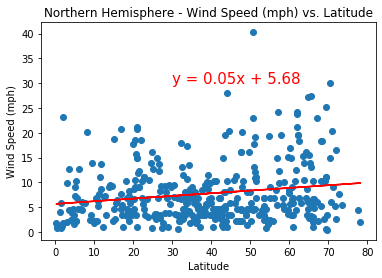

In [38]:
#Create the linear regression for the cities' wind speed vs. the northern latitudes
x = North_Hemisphere_df['Lat']
y = North_Hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-squared is: {rvalue}')

plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(30,30),fontsize=15,color="red")

plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()

The windy cities are farther north of the equator, but I wouldn't make that definitive due to the many outliers.

###  Southern  Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3886562839803571


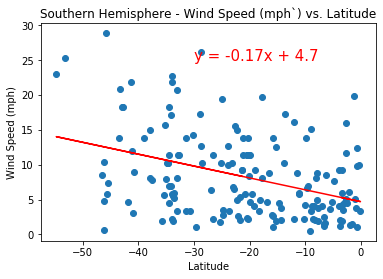

In [42]:
#Create the linear regression for the cities' wind speed vs. the southern latitudes
x = South_Hemisphere_df['Lat']
y = South_Hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The r-squared is: {rvalue}')

plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq, xy=(-50, 20), xytext=(-30, 25), fontsize=15,color="red")

plt.title('Southern Hemisphere - Wind Speed (mph`) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()

The cities that are farther south of the equator are very windy.